In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

# Q: 2.12 Hopfield Neural Network

The dynamics are give by,

$$
\dot x_i = \frac{dg_i(u_i)}{du_i} \times \frac{1}{C_i} \left( \sum_{j} T_{ij} x_j - \frac{u_i}{R_i} + I_i \right)
$$

where $g_i(u_i) = (2/π) atan(λπu_i/2)$, $\frac{dg_i(u_i)}{du_i} = 4λ / (λ^2 π^2 u_i^2 + 4)$

this is reformulated by taking $u_i = g^{-1}(x_i) = \frac{2}{λπ}tan(π x_i/2)$

doing this we get,
$$
\dot x_i = \frac{λ}{1 + tan^2(π x_i/2)} \times \frac{1}{C_i} \left( \sum_{j} T_{ij} x_j - \frac{2 \ tan(π x_i/2)}{λπR_i} + I_i \right)
$$

Note: $|T_{ij}| = 1/R_{ij}$ and $1/R_i = 1/ρ_i + \sum_{j} 1/R_{ij}$

In our problem; $i \in \{1,2 \}$, $x_i \in (-V_M, V_M)$ where $V_M = 1$, $T_{21} = T_{12} = 1$, $I_i = 0$, $C_i = 1$, $ρ_i = 1$, $T_{ii} = 0$. This gives the coupled equations as follows,

$$
1) \ \dot x_1 = λ \cos^2{(πx_1/2)} \times \left(x_2 - \frac{4 \ tan(π x_1/2)}{λπ}\right) 
\\
2) \ \dot x_2 = λ \cos^2{(πx_2/2)} \times \left(x_1 - \frac{4 \ tan(π x_2/2)}{λπ}\right)
$$


In [2]:
def hop(X, t, lam):
  x1, x2 = X
  # x1_dot = (lam/(1 + (np.tan(np.pi * x1/2)**2))) * (x2 - (4 * np.tan(np.pi * x1/2) / (lam * np.pi)))
  # x2_dot = (lam/(1 + (np.tan(np.pi * x2/2)**2))) * (x1 - (4 * np.tan(np.pi * x2/2) / (lam * np.pi)))
  x1_dot = (lam * x2 * (1 + np.cos(np.pi * x1)) / 2) - (2 * np.sin(np.pi * x1) / np.pi)
  x2_dot = (lam * x1 * (1 + np.cos(np.pi * x2)) / 2) - (2 * np.sin(np.pi * x2) / np.pi)

  return [x1_dot, x2_dot]

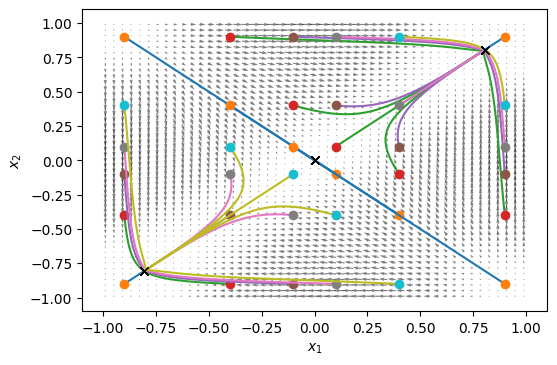

In [3]:
x1 = np.linspace(-0.99, 0.99, 50)
x2 = np.linspace(-0.99, 0.99, 50)

X1, X2 = np.meshgrid(x1, x2)

lam = 5

t = 0

u, v = np.zeros(X1.shape), np.zeros(X2.shape)

NI, NJ = X1.shape

for i in range(NI):
    for j in range(NJ):
        x1 = X1[i, j]
        x2 = X2[i, j]
        Xprime = hop([x1, x2], t, lam)
        u[i,j] = Xprime[0]
        v[i,j] = Xprime[1]
     

Q = plt.quiver(X1, X2, u, v, color='black', alpha=0.5)

tspan = np.linspace(0, 20, 2000)

for x1_val in [-0.9, -0.4, -0.1, 0.1, 0.4, 0.9]:
  for x2_val in [-0.9, -0.4, -0.1, 0.1, 0.4, 0.9]:
      ys = odeint(hop, [x1_val, x2_val], tspan, args=(lam,))
      plt.plot(ys[:,0], ys[:,1]) # path
      plt.plot([ys[0,0]], [ys[0,1]], 'o') # start
      plt.plot([ys[-1,0]], [ys[-1,1]], 'x', color='black') # end

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim([-1.1, 1.1])
plt.ylim([-1.1, 1.1])
plt.show()


# Q: 2.16 Prey Predator Evolution

The dynamics are given by,
$$
1) \ \dot x_1 = x_1 (1 - x_1 - a x_2)
\\
2) \ \dot x_2 = b x_2 (x_1 - x_2)
$$
where $a,b > 0$, $x_1$ corresponds to prey, and $x_2$ corresponds to predator. 

For our problem, $x_1, x_2 \ge 0$ and $a = 1, b = 0.5$

In [4]:
a = 1
b = 0.5

def prey_pred(X, t):
  x1, x2 = X[0], X[1]
  x1_dot = x1 * (1 - x1 - a*x2)
  x2_dot = b * x2 * (x1 - x2) 
  return [x1_dot, x2_dot]

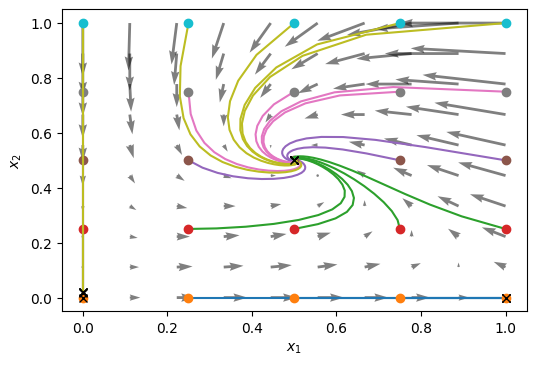

In [5]:
x1 = np.linspace(0, 1.0, 10)
x2 = np.linspace(0, 1.0, 10)

X1, X2 = np.meshgrid(x1, x2)

t = 0

u, v = np.zeros(X1.shape), np.zeros(X2.shape)

NI, NJ = X1.shape

for i in range(NI):
    for j in range(NJ):
        x1 = X1[i, j]
        x2 = X2[i, j]
        Xprime = prey_pred([x1, x2], t)
        u[i,j] = Xprime[0]
        v[i,j] = Xprime[1]
     

Q = plt.quiver(X1, X2, u, v, color='black', alpha=0.5)

tspan = np.linspace(0, 100, 200)

for x1_val in [0.0, 0.25, 0.5, 0.75, 1]:
  for x2_val in [0.0, 0.25, 0.5, 0.75, 1]:
      ys = odeint(prey_pred, [x1_val, x2_val], tspan)
      plt.plot(ys[:,0], ys[:,1]) # path
      plt.plot([ys[0,0]], [ys[0,1]], 'o') # start
      plt.plot([ys[-1,0]], [ys[-1,1]], 'x', color='black') # end

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.show()

# Q: 2.17(2) 

The dynamics are given by,

$$
1) \ \dot x_1 = x_2
\\
2) \ \dot x_2 = -x_1 + x_2 - 2 (x_1 + 2 x_2) x_2^2  
$$


In [6]:
def f1(X, t):
  x1, x2 = X[0], X[1]
  x1_dot = x2
  x2_dot = -x1 + x2 - 2*(x1 + 2*x2)*(x2**2)
  return [x1_dot, x2_dot]

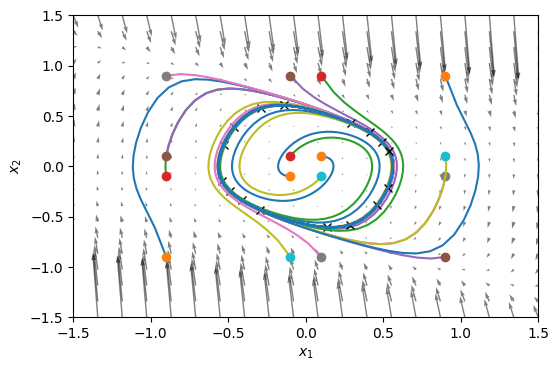

In [7]:
x1 = np.linspace(-1.5, 1.5, 20)
x2 = np.linspace(-1.5, 1.5, 20)

X1, X2 = np.meshgrid(x1, x2)

t = 0

u, v = np.zeros(X1.shape), np.zeros(X2.shape)

NI, NJ = X1.shape

for i in range(NI):
    for j in range(NJ):
        x1 = X1[i, j]
        x2 = X2[i, j]
        Xprime = f1([x1, x2], t)
        u[i,j] = Xprime[0]
        v[i,j] = Xprime[1]
     

Q = plt.quiver(X1, X2, u, v, color='black', alpha=0.5)

tspan = np.linspace(0, 50, 500)

for x1_val in [-0.9, -0.1, 0.1, 0.9]:
  for x2_val in [-0.9, -0.1, 0.1, 0.9]:
      ys = odeint(f1, [x1_val, x2_val], tspan)
      plt.plot(ys[:,0], ys[:,1]) # path
      plt.plot([ys[0,0]], [ys[0,1]], 'o') # start
      plt.plot([ys[-1,0]], [ys[-1,1]], 'x', color='black') # end

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.show()

# Q: 20(2)

The dynamics are given by,

$$
1) \ \dot x_1 = -x_1 + x_1^3 + x_1 x_2^2
\\
2) \ \dot x_2 = -x_2 + x_2^3 + x_1^2 x_2
$$

In [8]:
def f2(X, t):
  x1, x2 = X[0], X[1]
  x1_dot = -x1 + x1**3 + x1*(x2**2)
  x2_dot = -x2 + x2**3 + (x1**2)*x2
  return [x1_dot, x2_dot]

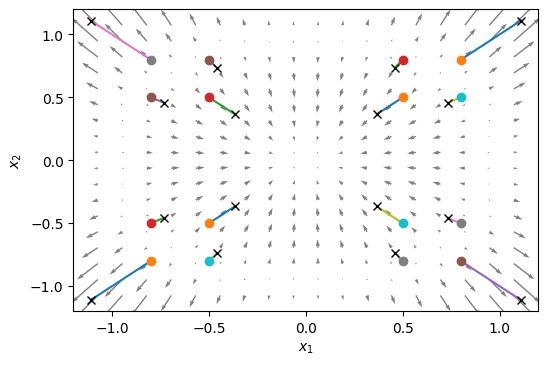

In [9]:
x1 = np.linspace(-1.2, 1.2, 20)
x2 = np.linspace(-1.2, 1.2, 20)

X1, X2 = np.meshgrid(x1, x2)

t = 0

u, v = np.zeros(X1.shape), np.zeros(X2.shape)

NI, NJ = X1.shape

for i in range(NI):
    for j in range(NJ):
        x1 = X1[i, j]
        x2 = X2[i, j]
        Xprime = f2([x1, x2], t)
        u[i,j] = Xprime[0]
        v[i,j] = Xprime[1]
     

Q = plt.quiver(X1, X2, u, v, color='black', alpha=0.5)

tspan = np.linspace(0, 0.5, 200) # Kept low end time since the solver crashes

for x1_val in [-0.8, -0.5, 0.5, 0.8]:
  for x2_val in [-0.8, -0.5, 0.5, 0.8]:
      ys = odeint(f2, [x1_val, x2_val], tspan)
      plt.plot(ys[:,0], ys[:,1]) # path
      plt.plot([ys[0,0]], [ys[0,1]], 'o') # start
      plt.plot([ys[-1,0]], [ys[-1,1]], 'x', color='black') # end

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim([-1.2, 1.2])
plt.ylim([-1.2, 1.2])
plt.show()